## Exploratory Data Analysis (EDA)

### Loading the libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

### Loading the dataset

In [55]:
data = pd.read_csv('olid-training-v1.0.tsv', sep='\t')

### Exploring the data

In [56]:
print(data.head())  # Display the first few rows

      id                                              tweet subtask_a  \
0  86426  @USER She should ask a few native Americans wh...       OFF   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2  16820  Amazon is investigating Chinese employees who ...       NOT   
3  62688  @USER Someone should'veTaken" this piece of sh...       OFF   
4  43605  @USER @USER Obama wanted liberals &amp; illega...       NOT   

  subtask_b subtask_c  
0       UNT       NaN  
1       TIN       IND  
2       NaN       NaN  
3       UNT       NaN  
4       NaN       NaN  


In [57]:
print(data.info())  # Overview of column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB
None


In [58]:
print(data.describe())  # Summary statistics of numerical columns

                 id
count  13240.000000
mean   54881.766163
std    26092.681658
min    10006.000000
25%    32235.750000
50%    54852.000000
75%    77743.250000
max    99986.000000


### Data Preprocessing

In [59]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove non-alphanumeric characters
    text = re.sub(r"[^\w\s]", "", text)
    # Remove specific words
    text = re.sub(r"\buser\b|\burl\b", "", text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    preprocessed_text = " ".join(filtered_tokens)
    return preprocessed_text

In [60]:
data['preprocessed_text'] = data['tweet'].apply(preprocess_text)

### Analyze Target Distribution (Sub-task A)

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64


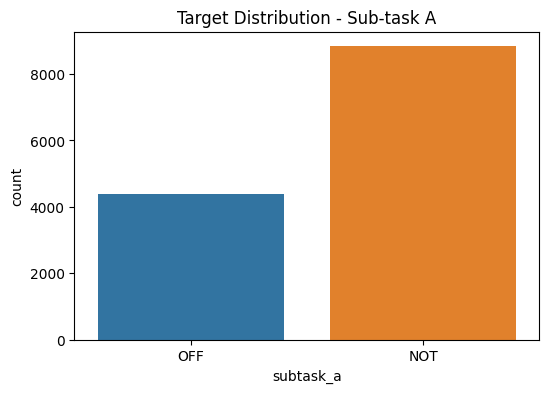

In [61]:
target_counts = data['subtask_a'].value_counts()
print(target_counts)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='subtask_a')
plt.title('Target Distribution - Sub-task A')
plt.show()

### Analyze Offense Level Distribution (Sub-task B)

TIN    3876
UNT     524
Name: subtask_b, dtype: int64


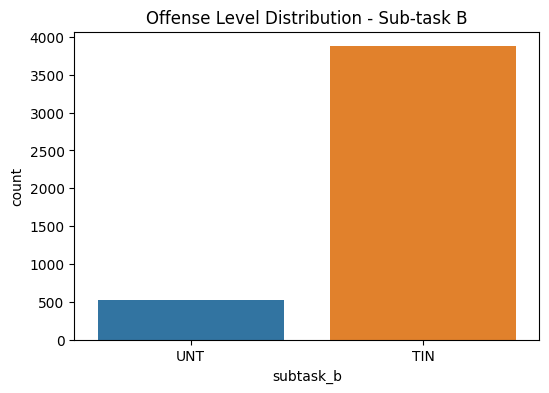

In [62]:
level_counts = data['subtask_b'].value_counts()
print(level_counts)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='subtask_b')
plt.title('Offense Level Distribution - Sub-task B')
plt.show()

### Analyze Offensive Target Distribution (Sub-task C)

IND    2407
GRP    1074
OTH     395
Name: subtask_c, dtype: int64


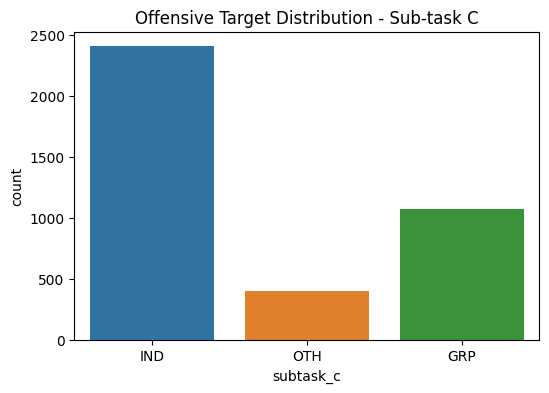

In [63]:
target_counts = data['subtask_c'].value_counts()
print(target_counts)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='subtask_c')
plt.title('Offensive Target Distribution - Sub-task C')
plt.show()

### Visualize Text Length

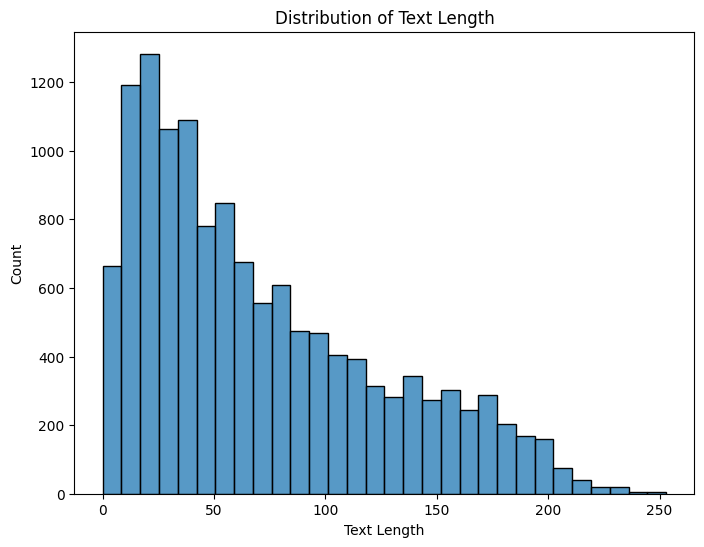

In [64]:
data['text_length'] = data['preprocessed_text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='text_length', bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

### Word Frequency Analysis

In [65]:
all_words = []
for tweet in data['preprocessed_text']:
    words = word_tokenize(tweet)
    all_words.extend(words)

word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

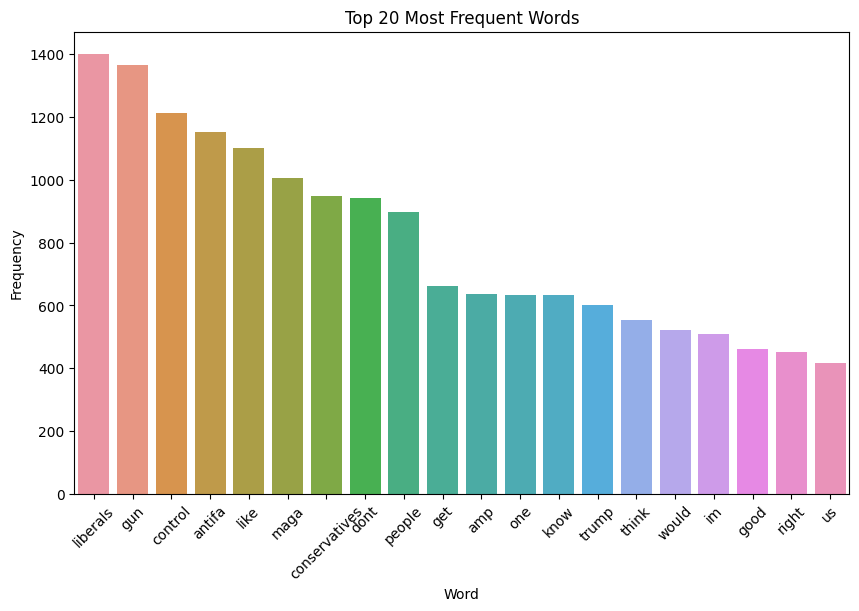

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Vocabulary

In [67]:
# Collect unique words
unique_words = set()
for tweet in data['preprocessed_text']:
    words = word_tokenize(tweet)
    unique_words.update(words)